# Performance of First Generation College Students in STEM Classes
## Class data 2015-2019(including summer classes)

Setups:

In [1]:
import seaborn as sns
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
from pathlib import Path

%matplotlib inline
plt.rcParams['figure.figsize'] = (16,8)
plt.rcParams['figure.dpi'] = 150
sns.set()

**Data introduction**

The data includes the information about students and related course they have been taken. Only data from 2015 to 2019 is chosen. 

Load all the data files needed:

In [2]:
stem_pathway_2007_2018 = pd.read_csv('firstgen/raw_data_wit/uc.berkeley.stem.pathways.2007.2018.csv')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (32,43,45,50,63,64,65,66,79,80,81,82,83,84,85,86,88,89,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
stem_pathway_2007_2017 = pd.read_csv('firstgen/raw_data_wit/uc.berkeley.stem.pathways.2007.2017.csv')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (33,43,44,50,51,53,55,56,57,58,59,60,61,62,63,64,65,66,67,72,73,74,75,76,77,78,79,80,81,82,83,89,90,92,93,94,95,96,97,98,99,100,101,102,103) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
class_data_2015 = pd.read_csv('firstgen/raw_data_wit/uc.berkeley.student.course.data.2015.csv')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Some experimental operations on dataframes above:

## First-Gen students indicators

For column `first.generation.college.1` shows the Standard **UCOP** definition of first-generation college: 

`Y` stands for "neither parent has earned four-year degree"

`N` stands for "At least one parent has earned four-year degree"

`U` stands for "Not enough information is available to assign Y or N"

For column `first.generation.college.2` shows the non-standard definition of first-generation college used by **OUA**: 

`Y` stands for "Neither parent has attended any college"

`N` stands for "At least one parent has attended college"

`U` stands for "Not enough information is available to assign Y or N"


In [5]:
filtered_pathway_2007_2017 = stem_pathway_2007_2017.loc[:, ('ppsk', 'first.generation.college.1', 'first.generation.college.2')].dropna()
filtered_pathway_2007_2017

,ppsk,first.generation.college.1,first.generation.college.2
0,1023906,N,N
1,161295,N,N
2,183848,U,U
3,232294,N,N
4,225526,N,N
...,...,...,...
80503,2854707,N,N
80504,2855617,N,N
80505,2855618,N,N
80506,2855940,Y,Y


## Merged 2015 course data(with first-gen information)

In [6]:
pathway_with_classes_2015 = class_data_2015.merge(filtered_pathway_2007_2017, left_on = 'ppsk', right_on = 'ppsk')

**2015 Spring analysis:**

In [7]:
pathway_with_classes_2015_Spring = pathway_with_classes_2015.loc[pathway_with_classes_2015['year.name'] == '2015 Spring']
pathway_with_classes_2015_Spring

,year.name,ppsk,undergrad.status,course.department,course.subject,course.number,offering.type,section.number,ccn,room.share,course.title,instructor.name,grade.subtype,grade.type,grade.name,grade.points,student.credit.hours,first.generation.college.1,first.generation.college.2
0,2015 Spring,331977,Undergraduate,Physics,Physics,141B,Primary,1,69495,69495,Solid State Physics,Joseph Orenstein,A,Letter Grade,A+,4.0,3.0,Y,Y
1,2015 Spring,331977,Undergraduate,Physics,Physics,250,Primary,1,69765,69765,Special Topics,James Analitis,A,Letter Grade,A,4.0,4.0,Y,Y
2,2015 Spring,331977,Undergraduate,Physics,Physics,H195B,Independent Study,6,69567,69567,Thesis Research,James Analitis,A,Letter Grade,A-,3.7,4.0,Y,Y
5,2015 Spring,331977,Undergraduate,Physics,Physics,111,Primary,2,69399,69399,Mod Phys Elect Lab,Arielle Little; Celeste Carruth; Dan Stamper-K...,C,Letter Grade,C,2.0,3.0,Y,Y
6,2015 Spring,331977,Undergraduate,Physics,Physics,H190,Primary,1,69528,69528,Phys Hnrs Course,Kam-Biu Luk,Credit,Non-Letter Grade,Pass,NaN,2.0,Y,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403362,2015 Spring,780484,Graduate,South & SE Asian Studies,South & SE Asian Studies,299B,Independent Study,1,83461,83461,Dis Prep Rel Res,George Hart,Administrative Code,Administrative Code,Unknown,NaN,12.0,N,N
403364,2015 Spring,800386,Graduate,Bioengineering,Bioengineering,299,Independent Study,15,7130,7130,Indiv Stud Research,Song Li,Administrative Code,Administrative Code,Unknown,NaN,12.0,Y,N
403366,2015 Spring,881632,Graduate,Law,Law,2991,Independent Study,1,50978,50978,Harvard Exchange U,NaN,Administrative Code,Administrative Code,Unknown,NaN,12.0,N,N
403367,2015 Spring,1486883,Undergraduate,English,English,80K,Primary,1,27938,27938,Children'S Lit,Joseph Lavery,Administrative Code,Administrative Code,Unknown,NaN,4.0,Y,Y


## CS 61A:

In [17]:
cs_61a = pathway_with_classes_2015_Spring.loc[pathway_with_classes_2015_Spring['course.title'] == 'Str Interp Cmp Prgs']
cs_61a_letter = cs_61a.loc[cs_61a['grade.type'] == 'Letter Grade']
cs_61a_letter_status = cs_61a_letter.loc[cs_61a_letter['first.generation.college.1'].isin(['Y', 'N'])]
cs_61a_by_type_status = cs_61a_letter_status.groupby(['first.generation.college.1', 'grade.subtype']).agg({'grade.subtype': 'count'})
cs_61a_by_type_status = cs_61a_by_type_status.rename(columns = {'grade.subtype': 'Count'})

In [18]:
non_first_gen_student_61a = cs_61a_letter_status.groupby('first.generation.college.1').count().iloc[0, 0]
first_gen_student_61a = cs_61a_letter_status.groupby('first.generation.college.1').count().iloc[1, 0]

non_first_gen_student_perc_61a = pd.DataFrame((cs_61a_by_type_status.loc[('N')]/non_first_gen_student).iloc[:,0])
first_gen_student_perc_61a = pd.DataFrame((cs_61a_by_type_status.loc[('Y')]/first_gen_student).iloc[:,0])


In [19]:
agg_data_61a = non_first_gen_student_perc_61a.copy()
agg_data_61a = agg_data_61a.rename(columns={'Count': 'Non First-Gen %'})

In [20]:
agg_data_61a['First-Gen %'] = first_gen_student_perc_61a.loc[:, 'Count']
agg_data_61a

,Non First-Gen %,First-Gen %
grade.subtype,,
A,0.372694,0.242938
B,0.509225,0.497175
C,0.077491,0.197740
D,0.011070,0.039548
F,0.029520,0.022599


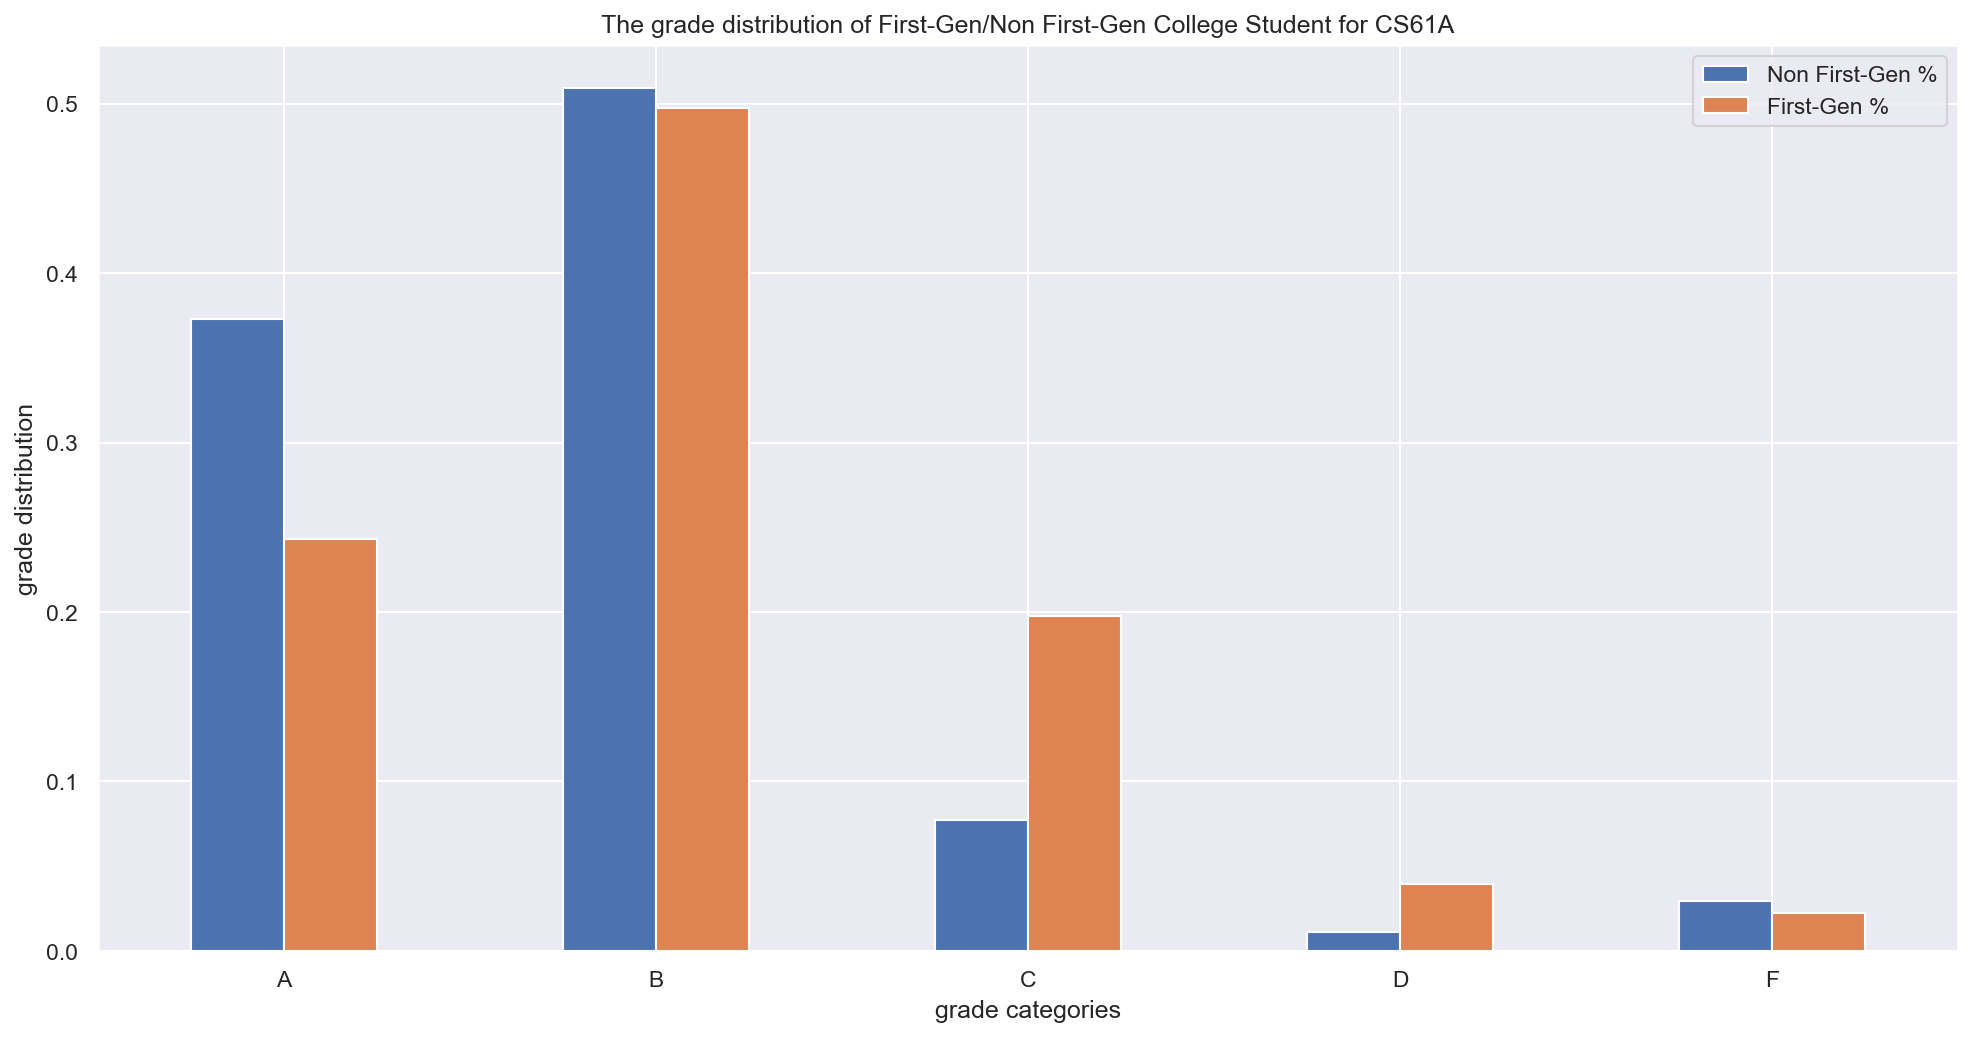

In [21]:
agg_data_61a.plot.bar(rot=0)
plt.title('The grade distribution of First-Gen/Non First-Gen College Student for CS61A')
plt.xlabel('grade categories')
plt.ylabel('grade distribution');

## CS 61B:

In [27]:
cs_61b = pathway_with_classes_2015_Spring.loc[pathway_with_classes_2015_Spring['course.title'] == 'Data Structures']
cs_61b_letter = cs_61b.loc[cs_61b['grade.type'] == 'Letter Grade']
cs_61b_letter_status = cs_61b_letter.loc[cs_61b_letter['first.generation.college.1'].isin(['Y', 'N'])]
cs_61b_by_type_status = cs_61b_letter_status.groupby(['first.generation.college.1', 'grade.subtype']).agg({'grade.subtype': 'count'})
cs_61b_by_type_status = cs_61b_by_type_status.rename(columns = {'grade.subtype': 'Count'})

In [28]:
non_first_gen_student_61b = cs_61b_letter_status.groupby('first.generation.college.1').count().iloc[0, 0]
first_gen_student_61b = cs_61b_letter_status.groupby('first.generation.college.1').count().iloc[1, 0]

non_first_gen_student_perc_61b = pd.DataFrame((cs_61b_by_type_status.loc[('N')]/non_first_gen_student_61b).iloc[:,0])
first_gen_student_perc_61b = pd.DataFrame((cs_61b_by_type_status.loc[('Y')]/first_gen_student_61b).iloc[:,0])


In [29]:
agg_data_61b = non_first_gen_student_perc_61b.copy()
agg_data_61b = agg_data_61b.rename(columns={'Count': 'Non First-Gen %'})
agg_data_61b['First-Gen %'] = first_gen_student_perc_61b.loc[:, 'Count']

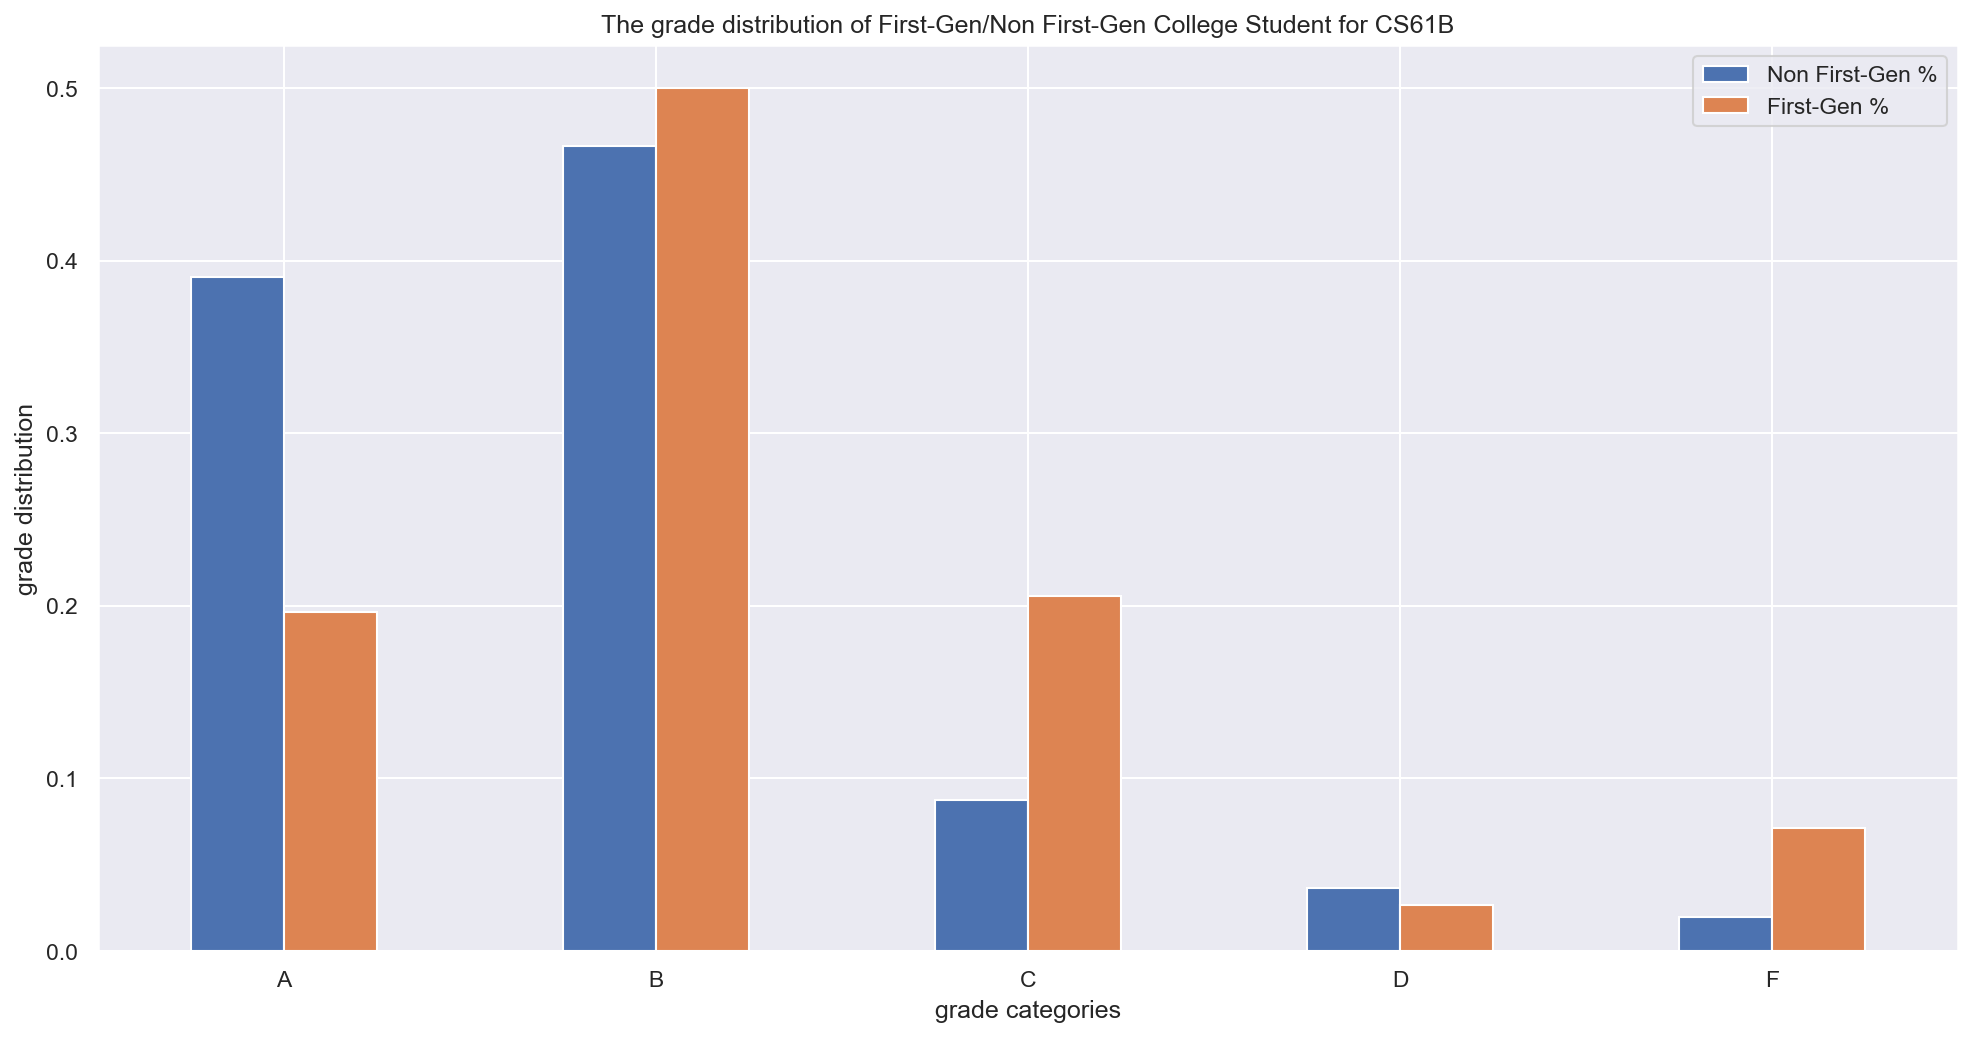

In [30]:
agg_data_61b.plot.bar(rot=0)
plt.title('The grade distribution of First-Gen/Non First-Gen College Student for CS61B')
plt.xlabel('grade categories')
plt.ylabel('grade distribution');

## CS 70:

In [35]:
cs_70 = pathway_with_classes_2015_Spring.loc[pathway_with_classes_2015_Spring['course.title'] == 'Discrete Math&Prob']
cs_70_letter = cs_70.loc[cs_70['grade.type'] == 'Letter Grade']
cs_70_letter_status = cs_70_letter.loc[cs_70_letter['first.generation.college.1'].isin(['Y', 'N'])]
cs_70_by_type_status = cs_70_letter_status.groupby(['first.generation.college.1', 'grade.subtype']).agg({'grade.subtype': 'count'})
cs_70_by_type_status = cs_70_by_type_status.rename(columns = {'grade.subtype': 'Count'})

In [36]:
non_first_gen_student_70 = cs_70_letter_status.groupby('first.generation.college.1').count().iloc[0, 0]
first_gen_student_70 = cs_70_letter_status.groupby('first.generation.college.1').count().iloc[1, 0]

non_first_gen_student_perc_70 = pd.DataFrame((cs_70_by_type_status.loc[('N')]/non_first_gen_student_70).iloc[:,0])
first_gen_student_perc_70 = pd.DataFrame((cs_61b_by_type_status.loc[('Y')]/first_gen_student_70).iloc[:,0])


In [37]:
agg_data_70 = non_first_gen_student_perc_70.copy()
agg_data_70 = agg_data_70.rename(columns={'Count': 'Non First-Gen %'})
agg_data_70['First-Gen %'] = first_gen_student_perc_70.loc[:, 'Count']

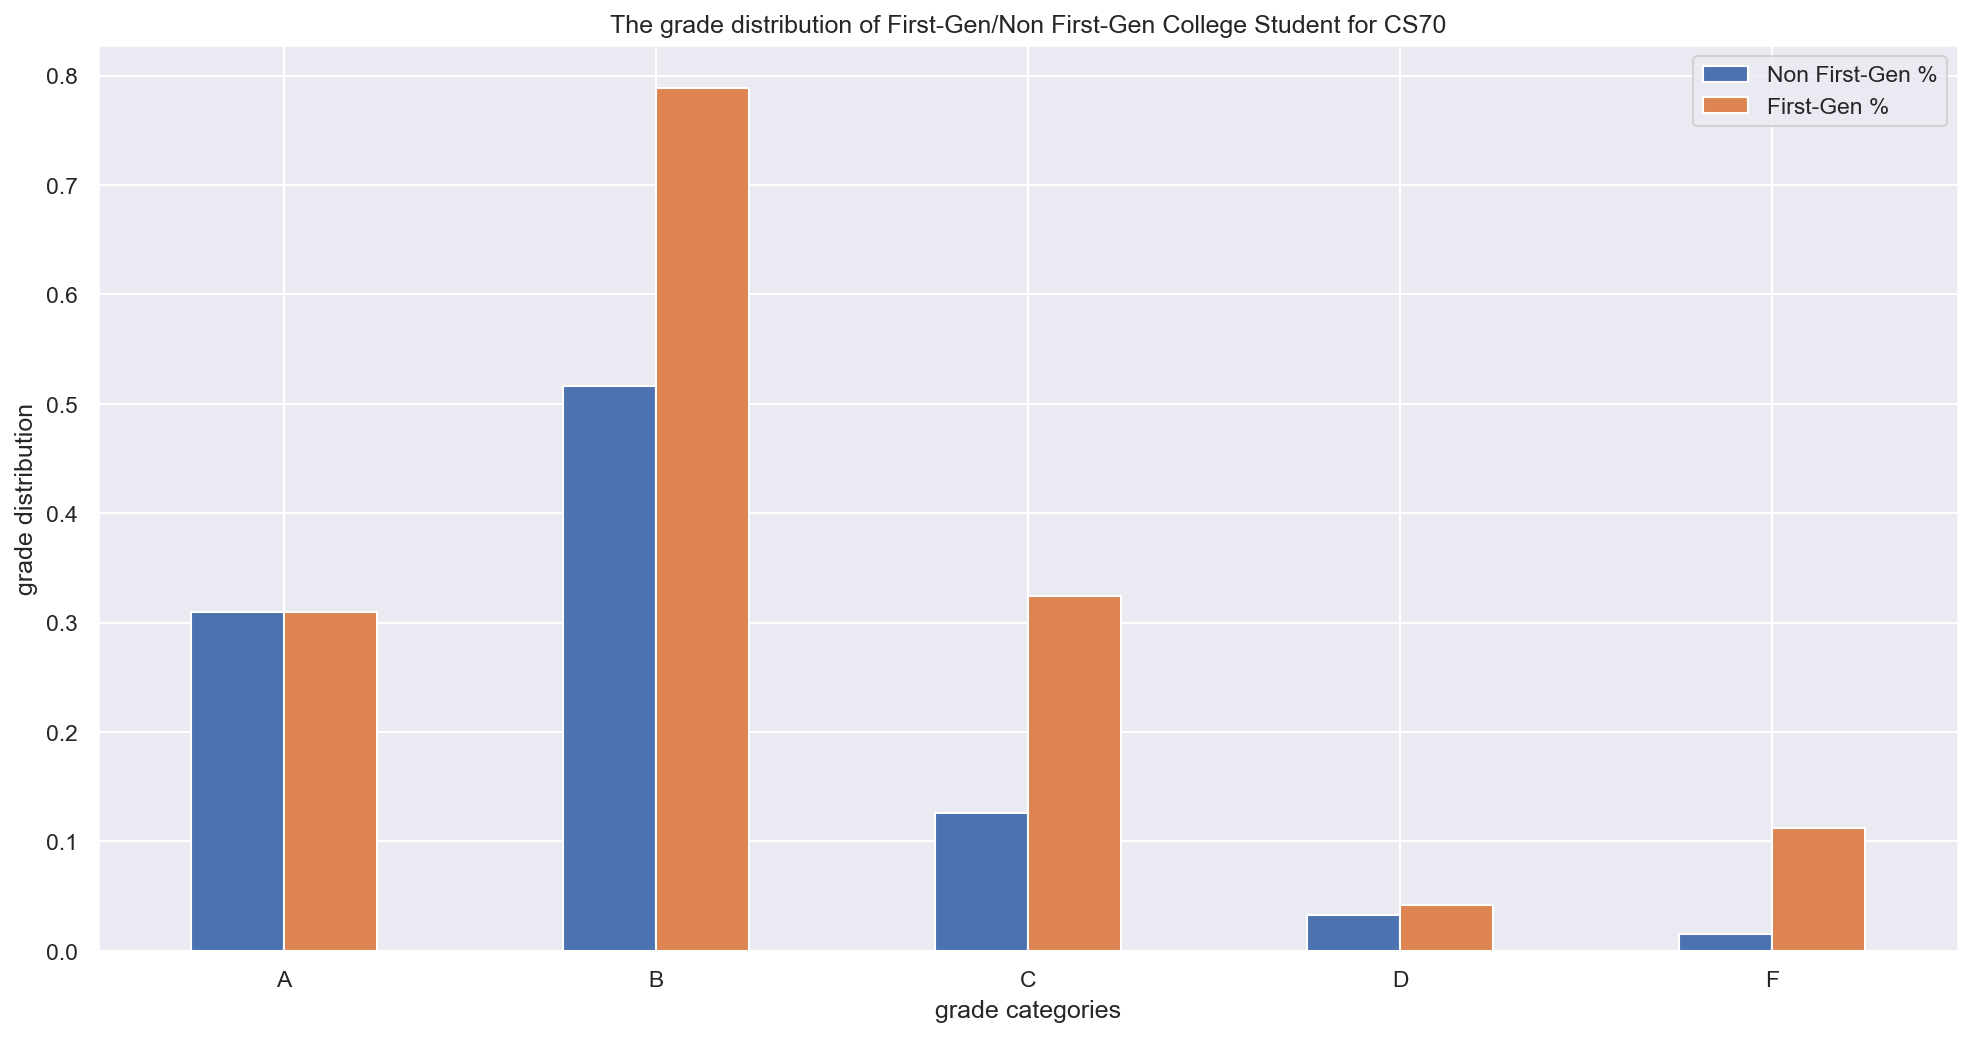

In [38]:
agg_data_70.plot.bar(rot=0)
plt.title('The grade distribution of First-Gen/Non First-Gen College Student for CS70')
plt.xlabel('grade categories')
plt.ylabel('grade distribution');

**2015 Fall analysis:**

In [30]:
pathway_with_classes_2015_Fall = pathway_with_classes_2015.loc[pathway_with_classes_2015['year.name'] == '2015 Fall']
pathway_with_classes_2015_Fall

,year.name,ppsk,undergrad.status,course.department,course.subject,course.number,offering.type,section.number,ccn,room.share,course.title,instructor.name,grade.subtype,grade.type,grade.name,grade.points,student.credit.hours,first.generation.college.1,first.generation.college.2
3,2015 Fall,331977,Graduate,Physics,Physics,240A,Primary,1,69723,69723,Quantum Theo Solids,Steven Louie,B,Letter Grade,B+,3.3,4.0,Y,Y
4,2015 Fall,331977,Graduate,Physics,Physics,209,Primary,1,69660,69660,Electromagnetism,Martin White,B,Letter Grade,B-,2.7,5.0,Y,Y
7,2015 Fall,331977,Graduate,Physics,Physics,301,Independent Study,1,70173,70173,Adv Prof Prep Phys,Marjorie Shapiro,Credit,Non-Letter Grade,Satisfactory,NaN,2.0,Y,Y
8,2015 Fall,331977,Graduate,Physics,Physics,375,Primary,1,70176,70176,Prof Prep Of Phys,Benjamin Spike,Credit,Non-Letter Grade,Satisfactory,NaN,2.0,Y,Y
12,2015 Fall,331977,Graduate,Physics,Physics,209,Secondary,102,69666,69666,Electromagnetism,Eugene Kur,Administrative Code,Administrative Code,Unknown,NaN,NaN,Y,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408216,2015 Fall,2641644,Undergraduate,FPF-Gender & Womens Studies,FPF-Gender & Womens Stds,10,Secondary,102,91109,91109,Int Gender/Wom Stdy,Laura Fantone,Administrative Code,Administrative Code,Unknown,NaN,NaN,Y,Y
408217,2015 Fall,2641644,Undergraduate,FPF-IAS Teaching Program,FPF-Middle Eastern Stds,10,Primary,1,91903,91903,Intro Middle East,Mahmood Monshipouri,Administrative Code,Administrative Code,Unknown,NaN,4.0,Y,Y
408218,2015 Fall,2641644,Undergraduate,FPF-Integrative Biology,FPF-Integrative Biology,33,Primary,1,91403,91403,Ecol Evol Of Dinos,Bonnie Rauscher,Administrative Code,Administrative Code,Unknown,NaN,3.0,Y,Y
408219,2015 Fall,2641644,Undergraduate,FPF-Political Science,FPF-Political Science,2,Primary,1,92303,92303,Intro Comparat Pol,Wendy Sinek,Administrative Code,Administrative Code,Unknown,NaN,4.0,Y,Y
